## Imports

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Constant

In [5]:
TOKEN_SPAM_PROB_FILE = 'SpamData1/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData1/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData1/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData1/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData1/03_Testing/test-target.txt'

VOCAB_SIZE = 2500

In [6]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
#Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
#Target Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham=np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens=np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [7]:
X_test[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.],
       [3., 0., 1., ..., 0., 0., 0.],
       [5., 1., 2., ..., 0., 0., 0.],
       [1., 2., 0., ..., 0., 0., 0.]])

# Calculating the Joint Probablity

### The Dot Project

In [11]:
a=np.array([1,2,3])
b=np.array([0,5,4])

print('a=',a)
print('b=',b)


a= [1 2 3]
b= [0 5 4]


In [12]:
a.dot(b)

22

In [14]:
1*0 + 2*5 +3*4

22

In [15]:
c=np.array([[0,6], [3,0], [5,1]])
print('shape of c is', c.shape)
print(c)

shape of c is (3, 2)
[[0 6]
 [3 0]
 [5 1]]


In [16]:
print(a.dot(c))
print('shae of the dot product is', a.dot(c).shape)

[21  9]
shae of the dot product is (2,)


In [17]:
[1*0 + 2*3 +3*5, 1*6 + 2*0 + 3*1 ]

[21, 9]

### Challenge: canyou figure out the dimensions of the dot product btwen X_test and Prob_token_spam

In [22]:
X_test.shape

(1724, 2500)

In [23]:
prob_token_spam.shape


(2500,)

In [25]:
print('shape of the dot product',X_test.dot(prob_token_spam).shape)

shape of the dot product (1724,)


## Set the Prior

$$P(Spam \, | \, x)= \frac{P(X \, | \, Spam |,) \, P(SPam)} {P(X)}$$ 

In [26]:
PROB_SPAM = 0.3116

**Challenge**: recall how to make the log of a numpy array? Cal the log prob.. of the tokens given that the email was spam

In [28]:
np.log(prob_token_spam)

array([ -4.70510889,  -5.32152228,  -4.98519763, ...,  -9.06126015,
        -9.89416927, -10.81046   ])

## Joint probablity in log format

In [31]:
joint_log_spam=X_test.dot(np.log(prob_token_spam)- np.log(prob_all_tokens)) + np.log(PROB_SPAM)

In [32]:
joint_log_spam[:5]

array([  3.21926579,  13.35310029,  19.22329985, -16.59574721,
        27.98072153])

**Challenge:** Cal. the Prob.. that the emails are non-spam given their tokens. Store the result in a var called joint_log_ham


$$P(ham \, | \, x)= \frac{P(X \, | \, ham |,) \, P(ham)} {P(X)}$$

In [33]:
PROB_HAM= 1-PROB_SPAM
print(PROB_HAM)
joint_log_ham=X_test.dot(np.log(prob_token_ham)- np.log(prob_all_tokens)) + np.log(PROB_HAM) 

0.6884


In [34]:
joint_log_ham[:5]

array([-11.05412802, -36.85845149, -38.27162954,  -2.71255363,
       -60.20277184])

In [36]:
joint_log_ham.size

1724

# Making Predictions

### Checking for the higher joint probability

$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$

<center> OR </center>
$$P(Spam \, | \, X) \, < \, P(Ham \, | \, X)$$

In [37]:
## challenge....

In [38]:
prediction = joint_log_spam > joint_log_ham

In [39]:
prediction[-5:]

array([False, False, False, False, False])

In [41]:
prediction[-5:] *1

array([0, 0, 0, 0, 0])

In [40]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

## Simplify

In [42]:
joint_log_spam=X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham=X_test.dot(np.log(prob_token_ham)) + np.log(PROB_HAM)

# Metrics and Evaluation

## Accuracy

In [43]:
correct_docs = (y_test == prediction).sum()
print('Docs classified correctly', correct_docs)
numdocs_wrong = X_test.shape[0] - correct_docs
print('Docs classified incorrectly', numdocs_wrong)

Docs classified correctly 1672
Docs classified incorrectly 52


In [44]:
# Accuracy
correct_docs/len(X_test)

0.9698375870069605

In [45]:
fraction_wrong = numdocs_wrong/len(X_test)
print('Fraction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('Accuracy of the model is {:.2%}'.format(1-fraction_wrong))

Fraction classified incorrectly is 3.02%
Accuracy of the model is 96.98%


## Visualising the Results

In [46]:
# Chart Styling Info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start=-14000, stop=1, num=1000)

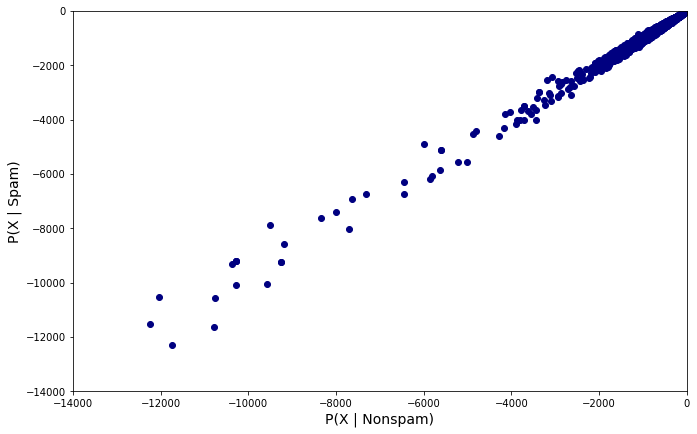

In [47]:
plt.figure(figsize=(11, 7))

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy')
plt.show()

## The Decision Boundary

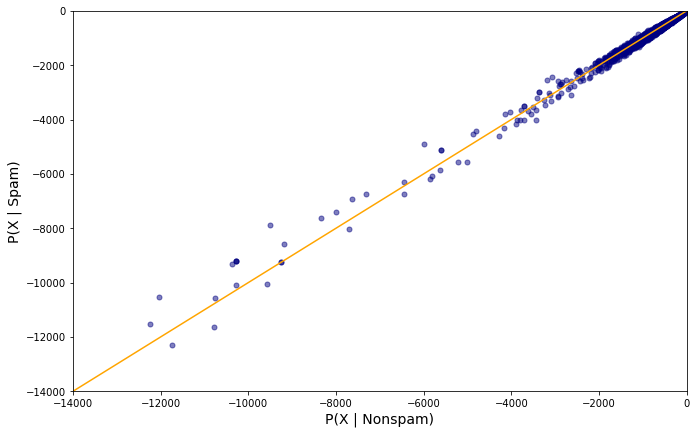

In [48]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

plt.show()

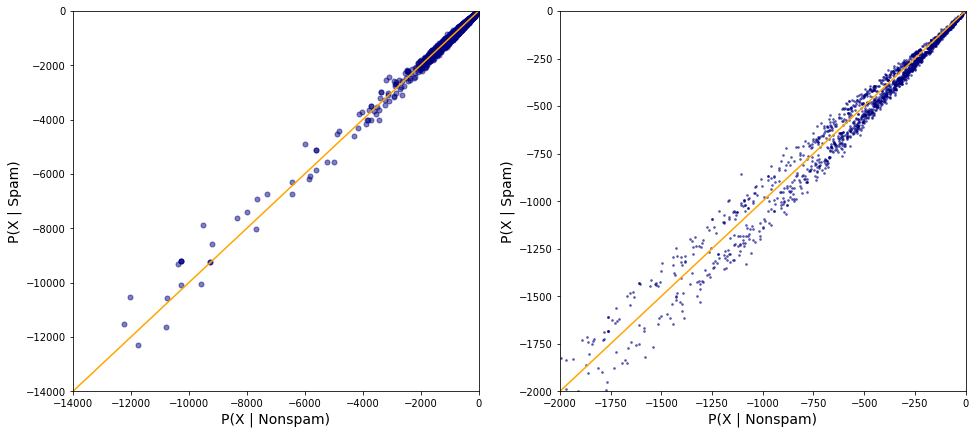

In [49]:
plt.figure(figsize=(16, 7))

# Chart Nr 1:
plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

# Chart Nr 2:
plt.subplot(1, 2, 2)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=3)
plt.plot(linedata, linedata, color='orange')

plt.show()

In [50]:
# Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, 
                          labels: y_test})

C:\Users\HP USER\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


AttributeError: module 'seaborn' has no attribute 'plt'

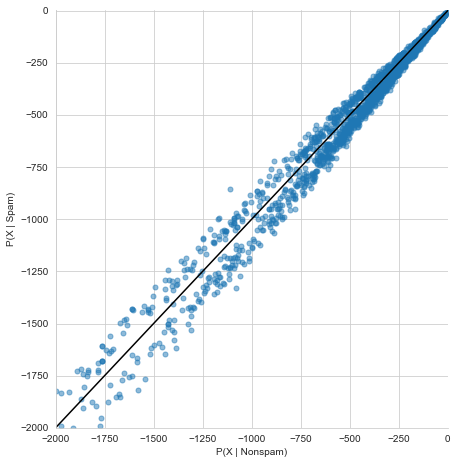

In [51]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size=6.5, fit_reg=False,
          scatter_kws={'alpha': 0.5, 's': 25})

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

sns.plt.show()

C:\Users\HP USER\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


AttributeError: module 'seaborn' has no attribute 'plt'

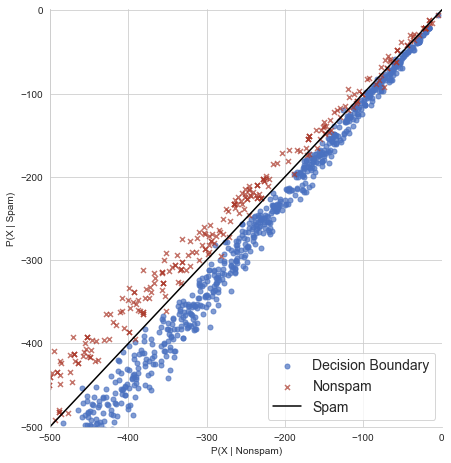

In [54]:
my_colours = ['#4A71C0', '#AB3A2C']

sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size=6.5, fit_reg=False, legend=False,
          scatter_kws={'alpha': 0.7, 's': 25}, hue=labels, markers=['o', 'x'], palette=my_colours)

plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

sns.plt.show()

In [55]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1165,  559], dtype=int64))

In [56]:
true_pos = (y_test == 1) & (prediction == 1)

In [57]:
true_pos.sum()

548

**Challenge:** Create a numpy array that measures the False Positives for each datapoint. Call this variable ```false_pos```. Then work out how many false positives there were. After you've done that, do the same for the false negatives. Store those in a variable called ```false_neg```

In [59]:
false_pos = (y_test == 0) & (prediction == 1)
false_pos.sum()

11

In [60]:
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

41

**Challenge:** Calculate the recall score. Store it in a variable called ```recall_score```. Print the value of the recall score as a percentage rounded to two decimal places.

In [62]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('Recall score is {:.2%}'.format(recall_score))

Recall score is 93.04%


## Precision Score

**Challenge:** Calculate the precision of our naive bayes model. Store the result in a variable called ```precision_score```. Print out the precision as a decimal number rounded to three decimal places. 

In [63]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision score is {:.3}'.format(precision_score))

Precision score is 0.98


## F-Score or F1 Score

In [64]:
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F Score is {:.2}'.format(f1_score))

F Score is 0.95
